In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O (e.g pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data set

# read train
train = pd.read_csv('Shabd_Train.csv')
print(train.shape)
print(train.head())

(243456, 1026)
   Index label  f_1  f_2  f_3  f_4  f_5  f_6  f_7  f_8  ...  f_1015  f_1016  \
0     83     अ  255  255  255  255  255  255  255  255  ...     255     255   
1    620     अ  255  255  255  255  255  255  255  255  ...     255     255   
2    508     अ  255  255  255  255  255  255  255  255  ...     255     255   
3    497     अ  255  255  255  255  255  255  255  255  ...     255     255   
4    679     अ  255  255  255  255  255  255  255  255  ...     255     255   

   f_1017  f_1018  f_1019  f_1020  f_1021  f_1022  f_1023  f_1024  
0     255     255     255     255     255     255     255     255  
1     255     255     255     255     255     255     255     255  
2     255     255     255     255     255     255     255     255  
3     255     255     255     255     255     255     255     255  
4     255     255     255     255     255     255     255     255  

[5 rows x 1026 columns]


In [3]:
# read test
test = pd.read_csv('Shabd_Test.csv')
print(test.shape)
print(test.head())

(60672, 1026)
   Index label  f_1  f_2  f_3  f_4  f_5  f_6  f_7  f_8  ...  f_1015  f_1016  \
0     12     अ  255  255  255  255  255  255  255  255  ...     255     255   
1     27     अ  255  255  255  255  255  255  255  255  ...     255     255   
2     30     अ  255  255  255  255  255  255  255  255  ...     255     255   
3     33     अ  255  255  255  255  255  255  255  255  ...     255     255   
4     36     अ  255  255  255  255  255  255  255  255  ...     255     255   

   f_1017  f_1018  f_1019  f_1020  f_1021  f_1022  f_1023  f_1024  
0     255     255     255     255     255     255     255     255  
1     255     255     255     255     255     255     255     255  
2     255     255     255     255     255     255     255     255  
3     255     255     255     255     255     255     255     255  
4     255     255     255     255     255     255     255     255  

[5 rows x 1026 columns]


In [27]:
# put labels into train and test variable
y_train = train['label']
y_test = test['label']
# Drop label column
# axis has two values 0 and 1, 0 means index(row) deletion and 1 means column deletion
X_train = train.drop(labels = ['label', 'Index'], axis = 1)
X_test = test.drop(labels = ['label', 'Index'], axis = 1)

print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)


X_train shape:  (243456, 1024)
X_test shape:  (60672, 1024)
y_train shape:  (243456,)
y_test shape:  (60672,)


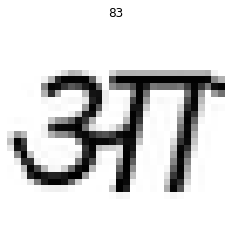

In [16]:
# plotting random sample from X_train
img = X_train.iloc[2000].to_numpy()
img = img.reshape((32,32))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

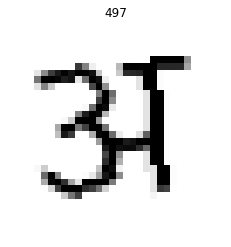

In [13]:
# plotting random sample from X_test

img = X_test.iloc[100].to_numpy()
img = img.reshape((32,32))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()

In [28]:
#using label encoder converting non numeric cols to numeric

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

print("Converted Non-Numeric Labels into numeric")

# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# print("Converted Numeric Labels into one-hot-encoding")

Converted Non-Numeric Labels into numeric


In [30]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state = 2)

In [31]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_test.shape)

# Here we are dividing our actual values from 255.0 so we get all the new values near to 1
# Hence making calcualtions easy and fast
# why divide by 255.0 as we know black and white images have a brightness range of 0 - 256 i.e total 255 values
# so as we have black and white images the values of pixels that we get after divide will be 0 for black and 1 for white

# we could also just replace all 255.0 values to 1 


(219110, 1024)
(24346, 1024)


In [33]:
# Reshape

X_train = X_train.values.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.values.reshape(X_test.shape[0], 32, 32, 1)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)


X_train shape:  (219110, 32, 32, 1)
X_test shape:  (24346, 32, 32, 1)


In [66]:
#
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters=8, kernel_size = (5,5), padding = 'Same', activation = 'relu', 
                 input_shape = (32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# Drop 25% of nodes
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size= (3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
# 256 - because grey scale image has 0-255 i.e 256 values
model.add(Dense(247, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax'))

In [67]:
# Define optimizer
optimizer = Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)

In [68]:
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [69]:
epochs = 5 # for better result increase the epochs
batch_size = 250

In [70]:
datagen = ImageDataGenerator(
    rotation_range= 5, # randomly rotate images in the range 5 degrees
    zoom_range = 0.1, # Randomly zoom image 10%
    width_shift_range=0.1, # randomly shift images horizontally 10%
    height_shift_range=0.1, # randomly shift images vertically 10%
)

datagen.fit(X_train)

In [71]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train),
                    epochs = epochs, validation_data = (X_test, y_test),
                    steps_per_epoch=X_train.shape[0] // batch_size)

C:\Users\jayan\AppData\Local\Temp\ipykernel_14056\1407581559.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train),


Epoch 1/5
876/876 [==============================] - 22s 24ms/step - loss: 0.0000e+00 - accuracy: 0.0025 - val_loss: 0.0000e+00 - val_accuracy: 0.0027
Epoch 2/5
876/876 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.0029 - val_loss: 0.0000e+00 - val_accuracy: 0.0027
Epoch 3/5
876/876 [==============================] - 18s 21ms/step - loss: 0.0000e+00 - accuracy: 0.0025 - val_loss: 0.0000e+00 - val_accuracy: 0.0027
Epoch 4/5
876/876 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.0028 - val_loss: 0.0000e+00 - val_accuracy: 0.0027
Epoch 5/5
876/876 [==============================] - 19s 21ms/step - loss: 0.0000e+00 - accuracy: 0.0030 - val_loss: 0.0000e+00 - val_accuracy: 0.0027


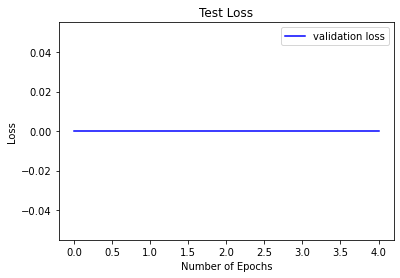

In [72]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert validation ovservations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plt the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap='Greens', linecolor='gray', fmt='.1f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

761/761 [==============================] - 3s 4ms/step


TypeError: Singleton array 583 cannot be considered a valid collection.

In [78]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[1], test_mse[1]))

Train: 0.003, Test: 0.003
